In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_dir=r'C:\Users\kores\Downloads\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\train'
validation_dir=r'C:\Users\kores\Downloads\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\Valid'
test_dir=r'C:\Users\kores\Downloads\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [4]:
train_data=ImageDataGenerator(rescale=(1./255),
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True
                             )
valid_data=ImageDataGenerator(rescale=(1./255))

In [5]:
train_gen=train_data.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2350 images belonging to 2 classes.


In [6]:
valid_gen=valid_data.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 641 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [8]:
conv_base=InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3))

In [9]:
from keras import layers
from keras import models

In [10]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [12]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [13]:
conv_base.trainable=False

In [14]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=(2e-5)),
             metrics=['acc'])

In [15]:
check_cb=keras.callbacks.ModelCheckpoint("CNN_ass1-{epoch:02d}.h5",save_best_only=True)

In [16]:
history=model.fit(
    train_gen,
    steps_per_epoch=118,
    epochs=50,
    validation_data=valid_gen,
    validation_steps=33)

Epoch 1/50
118/118 [==============================] - 75s 587ms/step - loss: 0.5447 - acc: 0.7055 - val_loss: 0.3691 - val_acc: 0.8378
Epoch 2/50
118/118 [==============================] - 40s 341ms/step - loss: 0.4420 - acc: 0.7796 - val_loss: 0.3179 - val_acc: 0.8643
Epoch 3/50
118/118 [==============================] - 42s 357ms/step - loss: 0.4364 - acc: 0.7957 - val_loss: 0.2887 - val_acc: 0.8814
Epoch 4/50
118/118 [==============================] - 44s 368ms/step - loss: 0.4086 - acc: 0.8123 - val_loss: 0.2876 - val_acc: 0.8768
Epoch 5/50
118/118 [==============================] - 41s 347ms/step - loss: 0.3999 - acc: 0.8200 - val_loss: 0.2981 - val_acc: 0.8721
Epoch 6/50
118/118 [==============================] - 42s 352ms/step - loss: 0.4131 - acc: 0.7957 - val_loss: 0.2700 - val_acc: 0.8783
Epoch 7/50
118/118 [==============================] - 41s 349ms/step - loss: 0.3866 - acc: 0.8213 - val_loss: 0.2905 - val_acc: 0.8674
Epoch 8/50
118/118 [==============================] - 4

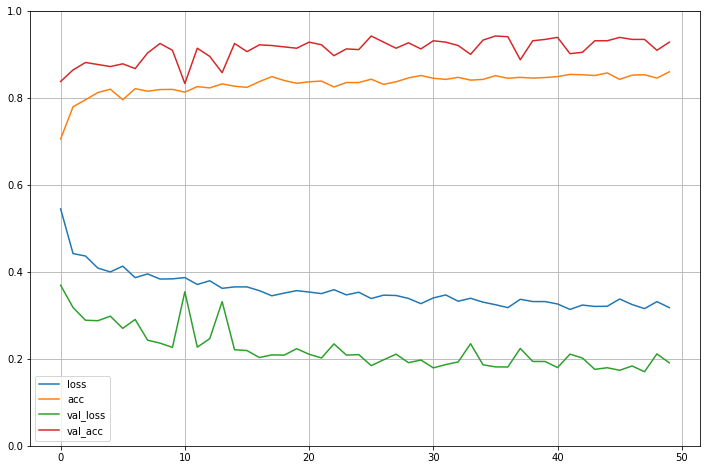

In [17]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

In [19]:
img=image.load_img(r'C:\Users\kores\Downloads\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\test\Normal\NormalG0 (165).png',target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
image_data=preprocess_input(x)
prob=model.predict(image_data)

1/1 [==============================] - 1s 1s/step


In [20]:
print(prob[0][0])

0.9991231


In [21]:
test_data=ImageDataGenerator(rescale=1./255)

In [22]:
test_gen=test_data.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    )

Found 845 images belonging to 2 classes.


In [23]:
model.evaluate(test_gen)

43/43 [==============================] - 16s 370ms/step - loss: 4.1663 - acc: 0.4166


[4.1663055419921875, 0.4165680408477783]

In [25]:
prob = model.predict(test_gen, 1)
print(prob)
if prob<=0.5:
    out = "Diseased"
    probab = 100*(1-prob)
    remedy = "Apply sulfur sprays or copper-based fungicides weekly at first sign of disease to prevent its spread."
    print(remedy)
else: 
    out = "Healthy"
    probab = 100*prob
    remedy = " "
    print(remedy)

43/43 [==============================] - 20s 384ms/step
[[0.9852089 ]
 [0.8404278 ]
 [0.9999852 ]
 [0.231104  ]
 [0.40751183]
 [0.99971426]
 [0.91138583]
 [0.66978824]
 [0.991552  ]
 [0.98876315]
 [0.9999898 ]
 [0.9011344 ]
 [0.7723416 ]
 [1.        ]
 [1.        ]
 [0.99934334]
 [0.86565346]
 [0.11467817]
 [0.14981374]
 [0.9993472 ]
 [0.99437463]
 [0.99968475]
 [0.999241  ]
 [0.9885243 ]
 [0.9959032 ]
 [0.6813509 ]
 [1.        ]
 [0.98072785]
 [1.        ]
 [0.9987883 ]
 [0.8098588 ]
 [1.        ]
 [0.45822555]
 [0.9941876 ]
 [1.        ]
 [0.9998871 ]
 [0.9999999 ]
 [0.9999742 ]
 [0.99999696]
 [1.        ]
 [0.9015304 ]
 [0.06004058]
 [0.10042271]
 [0.99992615]
 [0.90909004]
 [0.99439335]
 [0.961261  ]
 [0.1299272 ]
 [0.89857477]
 [0.97409415]
 [0.99996793]
 [0.36229143]
 [0.9836749 ]
 [0.99857277]
 [0.9876917 ]
 [0.9999649 ]
 [0.43090242]
 [0.99999976]
 [0.9999106 ]
 [0.99424577]
 [0.9885243 ]
 [1.        ]
 [0.9999804 ]
 [0.99979436]
 [0.9861768 ]
 [0.350358  ]
 [0.9995119 ]
 [0.88

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

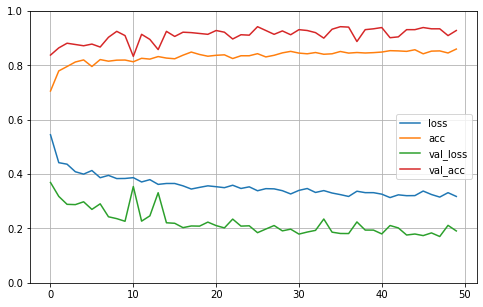

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()